In [2]:
import pandas  as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv("netflix_titles.csv")

**1º Passo: Limpeza de Dados**

* Analisar o dataset
* Limpar e analisar as colunas
* Remover colunas duplicadas 

In [3]:
# Analisando o número de linhas e colunas
data.shape
# Verificando os nomes das colunas
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

**Verificando os valores nulos**

In [4]:
# Analisando a quantidade de valores nulos presentes em nosso dataframe
data.isna().sum().sort_values()

show_id            0
type               0
title              0
release_year       0
duration           0
listed_in          0
description        0
rating            10
date_added        11
country          476
cast             570
director        1969
dtype: int64

**Verificando os valores únicos**

In [5]:
# O metodo nunique retornar os valores únicos presentes em uma coluna
data.nunique().sort_values()

type               2
rating            14
release_year      72
duration         201
listed_in        461
country          554
date_added      1524
director        3301
cast            5469
title           6172
description     6226
show_id         6234
dtype: int64

**Analisando os valores duplicados presentes nas colunas**

In [6]:
# Utilizando o metodo duplicated para analisar a quantidade de valores duplicados presentes em nossas colunas
data.duplicated().sum()

0

**Fazendo uma cópia do nosso dataframe, isso é importante para não afetarmos o dataframe original ao realizarmos a análise**

In [7]:
netflix_dados = data.copy()

**Limpando os valores nulos, verificamos anteriormente e agora iremos eliminá-los**

In [8]:
# Limpando os valores nulos
netflix_dados.dropna(inplace=True)
# Conferindo a quantidade de valores nulos após a limpeza, tem que ser 0
netflix_dados.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [9]:
# Podemos verificar que reduziu bastante com o shape
netflix_dados.shape

(3774, 12)

**Convertendo para o formato padrão de data e hora**

In [10]:
# Modifiquei a coluna date_added para o formato data e hora
netflix_dados["date_added"] = pd.to_datetime(netflix_dados['date_added'])
netflix_dados['day_added'] = netflix_dados['date_added'].dt.day
netflix_dados['year_added'] = netflix_dados['date_added'].dt.year
netflix_dados['month_added'] = netflix_dados['date_added'].dt.month
netflix_dados.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,year_added,month_added
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,9,2019,9
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,8,2017,9
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada",2017-09-08,2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f...",8,2017,9
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,2017-09-08,2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...,8,2017,9
9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden",2017-09-08,2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...,8,2017,9
11,70299204,Movie,Kidnapping Mr. Heineken,Daniel Alfredson,"Jim Sturgess, Sam Worthington, Ryan Kwanten, A...","Netherlands, Belgium, United Kingdom, United S...",2017-09-08,2015,R,95 min,"Action & Adventure, Dramas, International Movies","When beer magnate Alfred ""Freddy"" Heineken is ...",8,2017,9
19,80057969,Movie,Love,Gaspar Noé,"Karl Glusman, Klara Kristin, Aomi Muyock, Ugo ...","France, Belgium",2017-09-08,2015,NR,135 min,"Cult Movies, Dramas, Independent Movies",A man in an unsatisfying marriage recalls the ...,8,2017,9
20,80060297,Movie,Manhattan Romance,Tom O'Brien,"Tom O'Brien, Katherine Waterston, Caitlin Fitz...",United States,2017-09-08,2014,TV-14,98 min,"Comedies, Independent Movies, Romantic Movies",A filmmaker working on a documentary about lov...,8,2017,9
21,80046728,Movie,Moonwalkers,Antoine Bardou-Jacquet,"Ron Perlman, Rupert Grint, Robert Sheehan, Ste...","France, Belgium",2017-09-08,2015,R,96 min,"Action & Adventure, Comedies, International Mo...","A brain-addled war vet, a failing band manager...",8,2017,9
23,70304988,Movie,Stonehearst Asylum,Brad Anderson,"Kate Beckinsale, Jim Sturgess, David Thewlis, ...",United States,2017-09-08,2014,PG-13,113 min,"Horror Movies, Thrillers","In 1899, a young doctor arrives at an asylum f...",8,2017,9


**Vamos começar a parte da visualização dos dados, utilizando o Seaborn**
* 1º Análise: Relação entre os filmes e as séries, qual conteúdo é o mais produzido ?

**Relação entre filmes e séries**
   
Para realizar esse gráfico é interessante utilizar o **countplot**, para compararmos visuamente os dados.

O countplot cria gráficos de barras de acordo com o **número de observações** presentes em uma categoria, ou coluna do nosso dataframe. Assim podemos comparar diretamente quais tem a **maior frequência** entre elas.



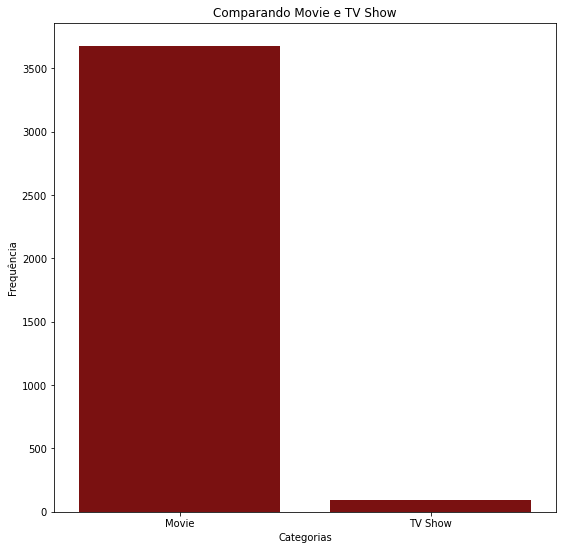

In [11]:
# Utilizando a biblioteca seaborn para criar o gráfico countplot
sns.countplot(x=netflix_dados["type"], color="darkred")
fig = plt.gcf()
fig.set_size_inches(9,9)
# Editando os eixos x e y
plt.xlabel("Categorias")
plt.ylabel("Frequência")
# Editando o titulo
plt.title('Comparando Movie e TV Show')
plt.savefig("1º Grafico.pdf")

**Fazendo o mesmo gráfico, porém de um jeito mais simples**

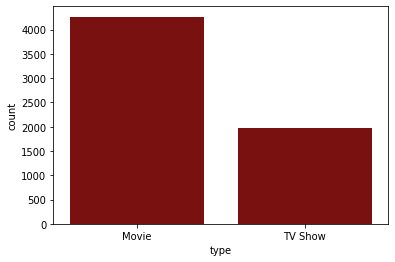

In [12]:
#  Estou pegando a coluna type, onde temos movie e séries e carregando nosso dataframe
sns.countplot(x="type", data = data, color='darkred')
plt.show()

**Vamos fazer um gráfico relacionando as proporções de produçao de Filmes(Movie) e TV-Show(Seriews)**

In [13]:
# Criando um dataframe para verificarmos a quantidade de filmes e series criadas em relação ao ano

# Realiza um agrupamento por ano e tipo, e em seguida, conta a quantidade de ocorrências de 'show_id' em cada grupo.
# unstack(fill_value=0): Transforma o resultado do agrupamento em um formato tabular, onde os anos se tornam índices de linha, os tipos se tornam colunas e os valores são preenchidos com contagens. 
# O parâmetro fill_value=0 preenche eventuais valores ausentes com zeros.
conteudo_distribuiçao = netflix_dados.groupby(["year_added", "type"])["show_id"].count().unstack(fill_value=0)
conteudo_distribuiçao

type,Movie,TV Show
year_added,,
2008,1,0
2009,2,0
2010,1,0
2011,13,0
2012,4,0
2013,6,1
2014,14,0
2015,47,3
2016,204,7


In [14]:

# Este comando adiciona uma nova coluna chamada 'Total' 
# ao DataFrame content_distribution. O valor de cada célula na coluna 'Total' é a soma dos valores das colunas existentes em cada linha.
conteudo_distribuiçao['Total'] = conteudo_distribuiçao.sum(axis=1)
conteudo_distribuiçao

type,Movie,TV Show,Total
year_added,,,
2008,1,0,1
2009,2,0,2
2010,1,0,1
2011,13,0,13
2012,4,0,4
2013,6,1,7
2014,14,0,14
2015,47,3,50
2016,204,7,211


**Aqui vamos criar nosso gráfico relacionando os filmes e series produzidos ao longos dos anos**

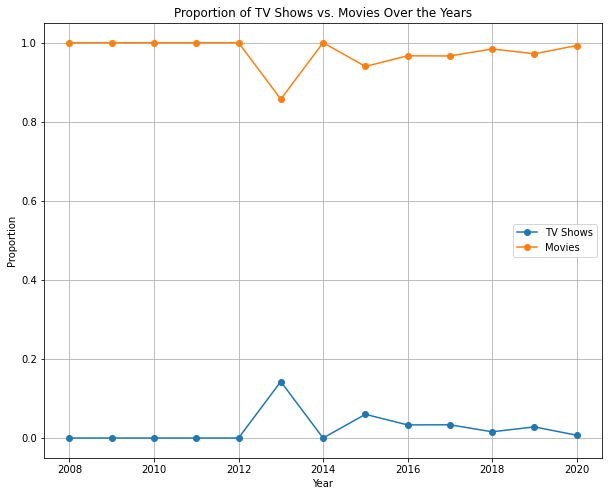

In [15]:
conteudo_distribuiçao['TV Show Proportion'] = conteudo_distribuiçao['TV Show'] / conteudo_distribuiçao['Total']
conteudo_distribuiçao['Movie Proportion'] = conteudo_distribuiçao['Movie'] / conteudo_distribuiçao['Total']

plt.figure(figsize=(10, 8))
plt.plot(conteudo_distribuiçao.index, conteudo_distribuiçao['TV Show Proportion'], label='TV Shows', marker='o')
plt.plot(conteudo_distribuiçao.index, conteudo_distribuiçao['Movie Proportion'], label='Movies', marker='o')
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.legend()
plt.title('Proportion of TV Shows vs. Movies Over the Years')
plt.grid(True)
plt.show()

**Filmes e series produzidas a partir dos anos 2000**

In [16]:
import plotly.express as px 
producao = netflix_dados[["release_year", "type"]]

producao = producao[producao['release_year']>=2000]
producao = producao.groupby(['release_year', 'type']).size().reset_index(name='Total Count')

graph = px.line(producao, x = "release_year", y="Total Count", color = "type", color_discrete_sequence=["darkred", "black"], title = ("Tendência dos conteúdos produzidos em cada ano a partir de 2000"))
graph.show()

**2º Análise: Faixa etária com mais conteúdo**

Sobre os ratings (classificações indicativas) dos conteúdos mais produzidos na Netflix em 2019, os três primeiros lugares são:

* 1º lugar: TV-MA
* 2º lugar: TV-14
* 3º lugar: R

Essas classificações indicativas são usadas para orientar o público sobre o conteúdo e sua adequação para diferentes faixas etárias. O "TV-MA" (Mature Audience) é indicado para maiores de 17 anos, "TV-14" é adequado para maiores de 14 anos e "R" geralmente requer que menores de 17 anos estejam acompanhados por um adulto

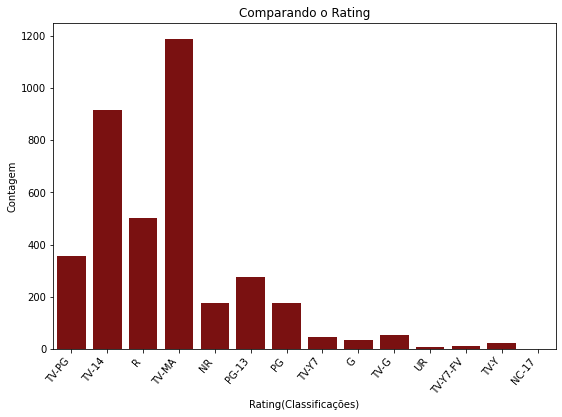

In [17]:

rating_graph = sns.countplot(x=netflix_dados['rating']).set_xticklabels(sns.countplot(x=netflix_dados['rating'], color="darkred").get_xticklabels(), rotation=50, ha="right")
fig = plt.gcf()
fig.set_size_inches(9,6)
plt.xlabel("Rating(Classificações)")
plt.ylabel("Contagem")
plt.title('Comparando o Rating')
plt.savefig("2º Grafico.pdf")

Utilizando o countplot do Seaborn para comparar as categorias de, filmes e séries, em relação ao rating.

Podemos ver que todas tem **mais produção de filmes que séries**

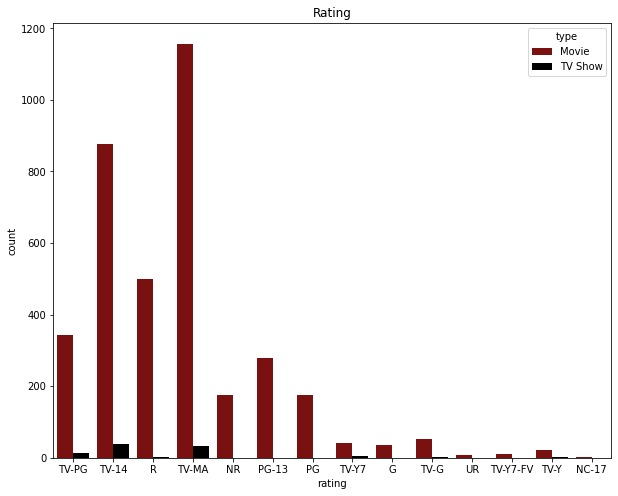

In [18]:
plt.figure(figsize=(10,8))
# use a handmade palette
cor = ["darkred", "black"]
sns.set_palette(cor)
sns.countplot(x='rating',hue="type", data=netflix_dados)
plt.title('Rating')
plt.savefig("4º grafico.pdf")

**Agora vamos conhecer quais generos foram mais produzidos pela Netflix em 2019**

Podemos ver que os 3 principais são:

* 1º Dramas e International Movies
* 2º Stand- Up comedy
* 3º Dramas, Independent Moveis

<AxesSubplot: >

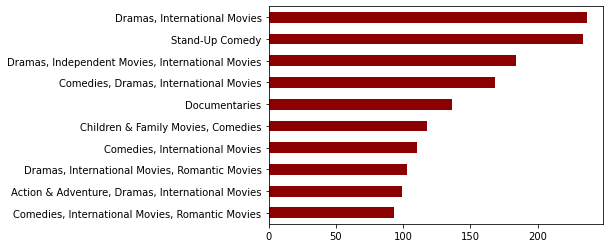

In [19]:
# Podemos fazer de forma simplificada e direta
netflix_dados["listed_in"].value_counts().head(10).sort_values().plot(kind="barh")

**2º Metodo utilizando plotly para criar um gráfico de pizza**

In [20]:
# criando a variável generos para armezenar os generos mais frequentes
generos = netflix_dados.groupby(["listed_in"]).size().reset_index(name="counts").sort_values(by="counts", ascending=False).head(10)
print(generos)

                                            listed_in  counts
218                      Dramas, International Movies     237
286                                   Stand-Up Comedy     234
211  Dramas, Independent Movies, International Movies     184
140            Comedies, Dramas, International Movies     168
187                                     Documentaries     136
82                 Children & Family Movies, Comedies     118
157                    Comedies, International Movies     110
221     Dramas, International Movies, Romantic Movies     103
35   Action & Adventure, Dramas, International Movies      99
160   Comedies, International Movies, Romantic Movies      93


In [21]:
# Criando o gráfico de pizza com as porcentagens
pieChart = px.pie(generos, values='counts', names='listed_in',color_discrete_sequence=px.colors.sequential.RdBu, title='Top 10 generos Netflix')
pieChart.show()

In [22]:
director = pd.DataFrame(netflix_dados["director"])
director

,director
0,"Richard Finn, Tim Maltby"
4,Fernando Lebrija
6,Gabe Ibáñez
7,"Rodrigo Toro, Francisco Schultz"
9,Henrik Ruben Genz
...,...
6142,Andy Devonshire
6158,Thomas Astruc
6167,"Vikramaditya Motwane, Anurag Kashyap"
6182,Jung-ah Im


In [23]:
director_and_listed_in = netflix_dados[["director", "listed_in"]]
director_and_listed_in

,director,listed_in
0,"Richard Finn, Tim Maltby","Children & Family Movies, Comedies"
4,Fernando Lebrija,Comedies
6,Gabe Ibáñez,"International Movies, Sci-Fi & Fantasy, Thrillers"
7,"Rodrigo Toro, Francisco Schultz",Stand-Up Comedy
9,Henrik Ruben Genz,"Action & Adventure, Thrillers"
...,...,...
6142,Andy Devonshire,"British TV Shows, Reality TV"
6158,Thomas Astruc,"Kids' TV, TV Action & Adventure"
6167,"Vikramaditya Motwane, Anurag Kashyap","Crime TV Shows, International TV Shows, TV Dramas"
6182,Jung-ah Im,"International TV Shows, Korean TV Shows, Stand..."


**3º Análise: Faixa etária com mais conteúdo**

Vamos criar um nuvem de palavra com a biblioteca **WorldCloud** sobre a coluna **Country** do nosso dataframe.
Assim podemos identificar os países onde que possuem a maior quantidade de produção de filmes e séries.

<AxesSubplot: >

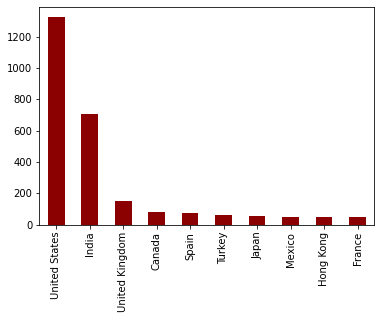

In [24]:
# Verificando os top 10 paises em produção
netflix_dados["country"].value_counts().head(10).plot(kind="bar")

**Criando a nuvem de palavras**

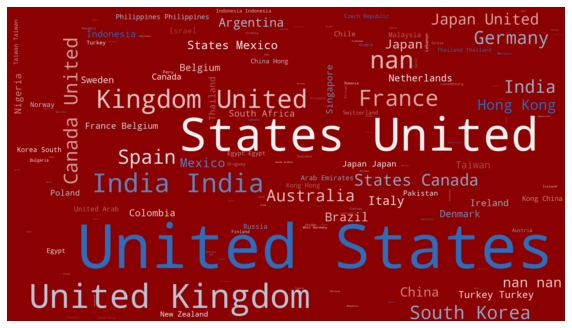

In [25]:
from wordcloud import WordCloud
text = " ".join(data["country"].astype(str))

# Gerar a nuvem de palavras
wordcloud = WordCloud(background_color='darkred',
                      width=1920,
                      height=1080,
                      colormap="vlag_r"
                      ).generate(text)

# Exibir a nuvem de palavras
plt.figure(figsize=(10, 15))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.savefig('country.png')
plt.show()